Connecting to databse

In [23]:
import sqlite3
import pandas as pd

takeaway_db = '../databases/takeaway.db'
deliveroo_db ='../databases/deliveroo.db'
ubereats_db ='../databases/ubereats.db'

def query_db(db, sql_query):
    ''' input: db (path to SQLite database), sql_query (str)
        output: pandas DataFrame
    '''
    conn = sqlite3.connect(db)
    with conn:
        res = pd.read_sql_query(sql_query, conn)
    if conn:
        conn.close()
    return res

In [ ]:
query = """ SELECT categories.name, AVG(menuItems.price) AS avg_price
            FROM menuItems
            LEFT JOIN categories ON menuItems.ID = categories.item_id
            GROUP BY categories.name
        """

query_deliveroo =  '''
        SELECT name ,latitude,longitude
        FROM restaurants   
        where postal_code != ''
        ;    
'''

query_takeaway = """ SELECT name, latitude,longitude
                     FROM restaurants
                     
                """
query_ubereats = """ SELECT title, location__latitude, location__longitude
                     FROM restaurants
                """

count_deliveroo = """ 
SELECT count(id)
FROM restaurants
"""

count_takeaway = """ 
SELECT count(primarySlug)
FROM restaurants
"""

count_ubereats = """ 
SELECT count(id)
FROM restaurants
"""

rest_deliveroo = """ 
SELECT name 
"""

df = query_db(deliveroo_db, count_deliveroo)
print(df)

   count(id)
0       2716


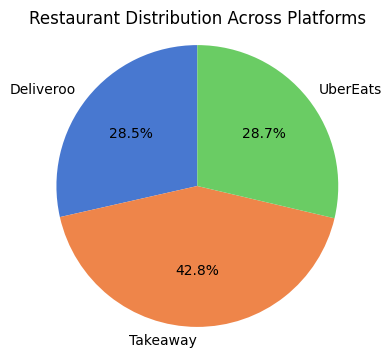

In [67]:
# pie chart distribution of restaurants for diffrent platform
import matplotlib.pyplot as plt
import seaborn as sns


# Query each database and get the counts
deliveroo_count = query_db(deliveroo_db, count_deliveroo).iloc[0, 0]  # Get the first row and first column value
takeaway_count = query_db(takeaway_db, count_takeaway).iloc[0, 0]
ubereats_count = query_db(ubereats_db, count_ubereats).iloc[0, 0]

# Create a DataFrame for the counts
platforms = ['Deliveroo', 'Takeaway', 'UberEats']
counts = [deliveroo_count, takeaway_count, ubereats_count]
count_df = pd.DataFrame({'Platform': platforms, 'Restaurant Count': counts})

# Create a pastel color palette from Seaborn
colors = sns.color_palette("muted", 3)

# Plot a pie chart
plt.figure(figsize=(4,4))
plt.pie(count_df['Restaurant Count'], labels=count_df['Platform'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Restaurant Distribution Across Platforms')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

In [62]:
# Query to get restaurant names from each platform's database

# For Deliveroo
query_deliveroo_names = """SELECT name FROM restaurants"""
deliveroo_restaurants = query_db(deliveroo_db, query_deliveroo_names)['name'].unique()

# For Takeaway
query_takeaway_names = """SELECT name FROM restaurants"""
takeaway_restaurants = query_db(takeaway_db, query_takeaway_names)['name'].unique()

# For UberEats
query_ubereats_names = """SELECT title FROM restaurants"""
ubereats_restaurants = query_db(ubereats_db, query_ubereats_names)['title'].unique()


In [63]:
# Convert lists to sets for easy set operations
deliveroo_set = set(deliveroo_restaurants)
takeaway_set = set(takeaway_restaurants)
ubereats_set = set(ubereats_restaurants)

# Find the common restaurants across the platforms
common_deliveroo_takeaway = deliveroo_set.intersection(takeaway_set)
common_deliveroo_ubereats = deliveroo_set.intersection(ubereats_set)
common_takeaway_ubereats = takeaway_set.intersection(ubereats_set)
common_all_three = deliveroo_set.intersection(takeaway_set, ubereats_set)


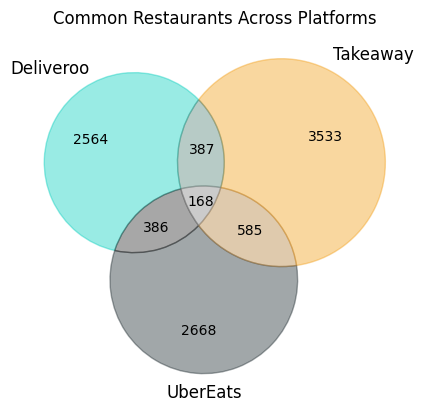

UberEats has the highest number of restaurants, suggesting that UberEats may be the market leader.


In [81]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define company colors for each platform
deliveroo_color = '#00cdbc'  # Darker Deliveroo Green
takeaway_color = '#F29C11'  # Darker Takeaway Yellow-Orange
ubereats_color = '#162328'  # Darker UberEats Dark Gray

# Create the Venn diagram (ensure the sets below are defined)
venn = venn3(subsets=(len(deliveroo_restaurants), len(takeaway_restaurants), len(common_deliveroo_takeaway),
                     len(ubereats_restaurants), len(common_deliveroo_ubereats), len(common_takeaway_ubereats),
                     len(common_all_three)),
             set_labels=('Deliveroo', 'Takeaway', 'UberEats'))

# Set the colors for each region using platform colors
venn.get_patch_by_id('100').set_color(deliveroo_color)  # Deliveroo-only
venn.get_patch_by_id('010').set_color(takeaway_color)  # Takeaway-only
venn.get_patch_by_id('001').set_color(ubereats_color)  # UberEats-only

# Set colors for overlapping regions with custom colors
venn.get_patch_by_id('110').set_color('#4D7F72')  # Deliveroo & Takeaway overlap
venn.get_patch_by_id('011').set_color('#B07C34')  # Takeaway & UberEats overlap
venn.get_patch_by_id('101').set_color('#252525')  # Deliveroo & UberEats overlap
venn.get_patch_by_id('111').set_color('#7D7D7D')  # All three overlap

# Add title to the diagram
plt.title('Common Restaurants Across Platforms')

# Show the plot
plt.show()

# Optional: Display additional analysis
print("UberEats has the highest number of restaurants, suggesting that UberEats may be the market leader.")




#UberEats has the highest number of restaurants, it suggests that UberEats is likely the market leader.

In [65]:
# Query restaurant categories (if available) from each platform
query_deliveroo_categories = "SELECT category, count(id) FROM restaurants GROUP BY category"
query_takeaway_categories = "SELECT category, count(primarySlug) FROM restaurants GROUP BY category"
query_ubereats_categories = "SELECT category, count(id) FROM restaurants GROUP BY category"

# Execute the queries and get the results
deliveroo_categories = query_db(deliveroo_db, query_deliveroo_categories)
takeaway_categories = query_db(takeaway_db, query_takeaway_categories)
ubereats_categories = query_db(ubereats_db, query_ubereats_categories)


DatabaseError: Execution failed on sql 'SELECT category, count(primarySlug) FROM restaurants GROUP BY category': no such column: category

c:\Users\Vinay\Desktop\Becode\Projects\delivery-market-analysis-with-SQL\.venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Restaurants in Belgium')

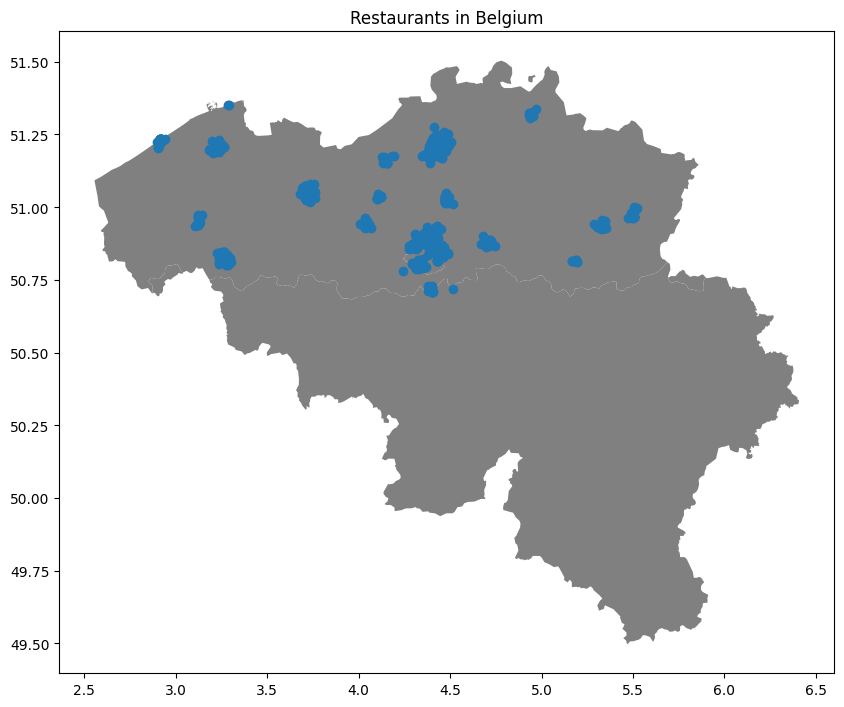

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
test = gpd.read_file(r"..\assets\geo\gadm41_BEL_1.shp")

crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)
geo_df.head()
fig, ax = plt.subplots(figsize = (10,10))
test.to_crs(epsg=4326).plot(ax=ax, color='grey')
geo_df.plot(ax=ax)
ax.set_title('Restaurants in Belgium')

Heatmap for Restaurants distribution.

In [37]:
# for deliveroo and takeaway

import folium
import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import HeatMap  # Import the HeatMap plugin
import webbrowser


# Read shapefile for Belgium boundaries
test = gpd.read_file(r"..\assets\geo\gadm41_BEL_2.shp")

# Prepare GeoDataFrame for restaurant locations
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Initialize the Folium map (centered around Belgium)
m = folium.Map(location=[50.8503, 4.3517], zoom_start=7)  # Centered on Belgium with zoom level 7

# Add Belgium boundary (GeoJSON) to the map
# Convert the GeoDataFrame to GeoJSON and add it as a layer
folium.GeoJson(test.to_crs(epsg=4326)).add_to(m)

# Prepare data for HeatMap: List of [latitude, longitude]
heat_data = [[row['latitude'], row['longitude']] for _, row in geo_df.iterrows()]

# Add HeatMap layer to the map
HeatMap(heat_data, radius=15, blur=10).add_to(m)

# Save the map with heatmap to an HTML file
map_path = r"..\assets\geo\restaurants_takeaway.html"
m.save(map_path)

# Open map in browser
webbrowser.open(map_path)


c:\Users\Vinay\Desktop\Becode\Projects\delivery-market-analysis-with-SQL\.venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


True

In [ ]:
# for ubereats

# Read shapefile for Belgium boundaries
test = gpd.read_file(r"..\assets\geo\gadm41_BEL_2.shp")

# Prepare GeoDataFrame for restaurant locations
geometry = [Point(lon, lat) for lon, lat in zip(df['location__longitude'], df['location__latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Initialize the Folium map (centered around Belgium)
m = folium.Map(location=[50.8503, 4.3517], zoom_start=7)  # Centered on Belgium with zoom level 7

# Add Belgium boundary (GeoJSON) to the map
# Convert the GeoDataFrame to GeoJSON and add it as a layer
folium.GeoJson(test.to_crs(epsg=4326)).add_to(m)

# Prepare data for HeatMap: List of [latitude, longitude]
heat_data = [[row['location__latitude'], row['location__longitude']] for _, row in geo_df.iterrows()]

# Add HeatMap layer to the map
HeatMap(heat_data, radius=15, blur=10).add_to(m)

# Save the map with heatmap to an HTML file
map_path = r"..\assets\geo\restaurants_ubereats.html"
m.save(map_path)

# Open map in browser
webbrowser.open(map_path)


c:\Users\Vinay\Desktop\Becode\Projects\delivery-market-analysis-with-SQL\.venv\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


True